# 2.2 ニューラルネットワークでのデータ表現  
テンソルとは、多次元のNumPy配列に格納されたデータである。  
基本的にテンソルは、データのコンテナである。  
テンソルの次元（dimension）は、軸（axis）とよばれる。  

## 2.2.1 スカラー：0次元テンソル  

In [5]:
import numpy as np
x = np.array(12)
x

array(12)

In [6]:
x.ndim

0

## 2.2.2 ベクトル：1次元テンソル

In [7]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [8]:
x.ndim

1

上の例は、5次元ベクトルである。5次元テンソルと混同しないこと！  

## 2.2.3 行列：2次元テンソル

In [10]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x.ndim

2

行列とは、2次元テンソルである。

## 2.2.4 3次元テンソルとより高次元のテンソル

In [13]:
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])
x.ndim

3

一般に、DLで操作するのは0次元から4次元のテンソルですが、動画データの処理では5次元テンソルを扱う場合がある。

## 2.2.5 テンソルの重要な属性  
### 軸の数（階数）
### 形状
### データ型

In [14]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [15]:
# KerasでのMNISTデータセットの読み込み
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
# grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9).
print ('軸の数: ', train_images.ndim)
print ('形状: ', train_images.shape)
print ('データ型: ', train_images.dtype)

軸の数:  3
形状:  (60000, 28, 28)
データ型:  uint8


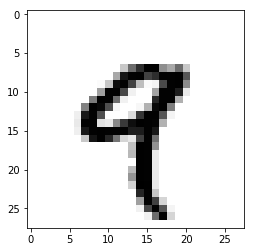

In [20]:
# 4つめの数字を表示
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2.2.6 NumPyでのテンソルの操作

In [22]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [23]:
# 上記と同じ操作
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [24]:
# もうひとつ上記と同じ操作
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

## 2.2.8 データテンソルの現実的な例

### ・ベクトルデータ
形状が（samples, features）の２次元テンソル  
最も一般的なデータ。１つ目の軸はサンプル軸、２つ目の軸は特徴軸となることが多い。 

#### ex1) 人の年齢、郵便番号と住所、収入をまとめた生命表データセット
人をそれぞれ３つの値からなるベクトルとして特徴づけたデータ。したがって形状(10000, 3)の2次元テンソルに格納できる。

#### ex2) テキスト文書からなるデータセット
各文書は、20000語の辞書に基づき、各単語の出現回数によって表されます。各文書は20000語の値からなるベクトルとしてエンコードできる。  
したがって、500個の文書からなるデータセット全体を、形状が(500, 20000)のテンソルに格納できる。  

### ・時系列データまたはシーケンス（系列）データ
形状が（samples, timesteps, features）の３次元テンソル  
データにおいて時間（またはシーケンスの順序）が重要となる場合は、常にそうしたデータを明示的な時間軸を持つ3次元テンソルに格納する。

#### ex1) 株価のデータセット
現在の株価と1分間の最高値と最安値が1分おきに格納される。  
したがって、1分間のデータは3次元ベクトルとしてエンコードされる。1日の取引時間を390分とすれば、1日分の株取引は形状が(390, 3) の2次元テンソルとしてエンコードされる。250日分のデータは形状が(250, 3, 390)の3次元テンソルに格納できる。

#### ex2) ツイートのデータセット


### ・画像
形状が（samples, height, width, channels）または（samples, channels, height, width）の４次元テンソル  
サイズが256x256のグレースケール画像が128個含まれたバッチは、形状が(128, 256, 256, 1)のテンソルに格納できる。  
カラー画像は、形状が(128, 256, 256, 3)のテンソルに格納できる。


### ・動画
形状が（samples, frames, height, width, channels）または（samples, frames, channels, height, width）の５次元テンソル  
60秒間の144x256ビデオクリップを4fpsでサンプリングすると、フレーム数は240。形状が(4, 240, 144, 256, 3) のテンソルに格納できる。
